<a href="https://colab.research.google.com/github/mkvkanpur/field_theory/blob/main/HD_2_3dim_field_th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definition

In [ ]:
import numpy as np
import math as m
from scipy.integrate import quad, romberg
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'STIXGeneral'

mpl.rc('font', size=12)
mpl.rc('axes', titlesize=10) #fontsize of the title
mpl.rc('axes', labelsize=10) #fontsize of the x and y labels
mpl.rc('xtick', labelsize=10) #fontsize of the x tick labels
mpl.rc('ytick', labelsize=10) #fontsize of the y tick labels
mpl.rc('legend', fontsize=10) #fontsize of the legend

d = 2

def area_sphere(d):
	return(2*np.pi**(d/2)/m.gamma(d/2.0))

def C(v):
  return((2.0/(area_sphere(d)*(d-1)))*pow(v,-d-2.0/3))

def dvol_RG(v, z):
  if (d==2):
    return 2*v/np.sqrt(1-z**2)
  elif (d==3):
    return area_sphere(d-1)*v**2

# for 2D
def dvol_RG_TFM(v, z):
  return 2*v

def dvol_ET(v, z):
  if (d==2):
    return area_sphere(d)*area_sphere(d-1)*v
  elif (d==3):
    return area_sphere(d)*area_sphere(d-1)*v**2


In [ ]:
x = C(1)
print(area_sphere(1), 8*np.pi**2, dvol_RG_TFM(1.5,0.9))


2.0 78.95683520871486 3.0


# RG of CH1 field

b = 1.7
Intgral = 0.010527571761813579
nu1 = 0.10260395587799516

In [ ]:
b = 1.7

def RG1_CH1(v,z):
  wsqr = 1 + v**2 - 2*v*z
  denr = v**(2/3) + wsqr**(1/3)
  return dvol_RG(v,z)*C(v)*(1-v**2)*(1-z**2) \
          *(2*v*z-1)/(wsqr*denr)

def RG2_CH1(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = v**(2/3) + w**(2/3)
  return dvol_RG(v,z) *v * (1-z**2) \
          *(2*v*z-1) * (v-2*z)* C(w) /(w**2*denr)

def fv_RG_2D(v):
  lower_lim = (v**2+1-b**2)/(2*v)
  upper_lim = v/2
  f1 = quad(lambda z: RG1_CH1(v,z), lower_lim, upper_lim)[0]
  f2 = quad(lambda z: RG2_CH1(v,z), lower_lim, upper_lim)[0]
  return f1+f2

integ_CH1 = -romberg(lambda v: fv_RG_2D(v), 1, b)
nu1 =  np.sqrt(integ_CH1/(1-b**(-4/3)))

print(integ_CH1, nu1)



0.010527571761813579 0.144080635033982


# Test-field model of Kraichnan

In [ ]:
from scipy.special import roots_jacobi
from scipy.integrate import quad, romberg
from google.colab import files

b = 300


n=100
alpha = 1/2; beta = 1/2
[rt, wt] = roots_jacobi(n, alpha, beta, mu=False)

def TFM1_CH1(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = v**(2/3) + w**(2/3)
  return dvol_RG_TFM(v,z)*C(v)*(1-v**2) \
          *(2*v*z-1)/(w**2*denr)

def TFM2_CH1(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = v**(2/3) + w**(2/3)
  return dvol_RG_TFM(v,z) *v  \
          *(2*v*z-1) * (v-2*z)* C(w) /(w**2*denr)


def fvTFM_2D(v):
  f1 = sum(TFM1_CH1(v, rt)*wt)
  f2 = sum(TFM2_CH1(v, rt)*wt)
  return  f1 + f2

myeps = 1.5e-1
integ_CH1 = -romberg(lambda v: fvTFM_2D(v), 1+myeps, b)
nu1 =  np.sqrt(abs(integ_CH1))

print(integ_CH1, nu1)



0.48089516701419394 0.6934660532529289


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.537572e-01
  warnings.warn(


# RG of CH2 fields

In [ ]:
b = 1.7
d=3

def RG1_3D(v,z):
  wsqr = 1 + v**2 - 2*v*z
  denr = v**(2/3) + wsqr**(1/3)
  return dvol_RG(v,z)*C(v)*(1-z**2)/denr

def RG2_3D(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = v**(2/3) + w**(2/3)
  return dvol_RG(v,z) * v**2 * (1-z**2)*C(w)/(w**2*denr)

def fv(v):
  lower_lim = (v**2+1-b**2)/(2*v)
  upper_lim = v/2
  f1 =  quad(lambda z: RG1_3D(v,z), lower_lim, upper_lim)[0]
  f2 =  quad(lambda z: RG2_3D(v,z), lower_lim, upper_lim)[0]
  return f1+f2

#integ_CH1 = romberg(lambda p: quad(lambda q: fCH1(p,q), 1,min(p+1,b))[0], 1, b)
integ_CH2 = romberg(lambda v: fv(v), 1, b)
nu2 =  np.sqrt(integ_CH2/(1-b**(-4/3)))

print(integ_CH2, nu2)


0.11974474403599905 0.48592555426548273


# CH2: 3D ET integral using exact functions from Mathematica

In [ ]:
def f(v,z):
  numr1 = 28+ 51*(v**(2/3)+v**(4/3))+ 60*v**2+ 162*(v**(8/3)+v**(10/3))+ 60*v**4 \
      + 51*(v**(14/3)+v**(16/3))+ 28*v**6- 66*v*z -132*z*(v**(5/3)+v**(7/3)) \
      - 44*v**3*z -132*z*(v**(11/3)+v**(13/3))- 66*z*v**5
  numr1 *= 63
  denr1 = (1+v**(2/3))**4 * (1+v**2-2*v*z)**(11/6)

  numr2 = 20+ 39*(v**(2/3)+v**(4/3))+ 36*v**2+ 90*(v**(8/3)+v**(10/3))+ 36*v**4 \
      + 39*(v**(14/3)+v**(16/3))+ 20*v**6- 42*v*z -84*z*(v**(5/3)+v**(7/3)) \
      - 28*v**3*z -84*z*(v**(11/3)+v**(13/3))- 42*z*v**5
  numr2 *= 495
  denr2 =  (1+v**(2/3))**6 * (1+v**2-2*v*z)**(7/6)

  numr3 = -8 -15*(v**(2/3)+v**(4/3)) -16*v**2 -42*(v**(8/3)+v**(10/3)) -16*v**4 \
      -15*(v**(14/3)+v**(16/3)) -8*v**6 +18*v*z +36*z*(v**(5/3)+v**(7/3)) \
      +12*v**3*z +36*z*(v**(11/3)+v**(13/3)) +18*z*v**5
  numr3 *= 385
  denr3 =  (1+v**(2/3))**5 * (1+v**2-2*v*z)**(3/2)

  numr4 = 4 +12*v**(2/3) +21*(v**(4/3)+v**(8/3)) + 22*v**2 + 12*v**(10/3) + 4*v**4
  numr4 *= 3465*np.arctan((1+v**2-2*v*z)**(1/6)/np.sqrt(1+v**(2/3)))
  denr4 =  (1+v**(2/3))**(13/2)

  final_numr = (numr1/denr1 + numr2/denr2 + numr3/denr3 + numr4/denr4)
  final_denr = 4620*v**3

  return final_numr/final_denr

myeps = 1e-5
def fv(v):
  return -(f(v,1-myeps) - f(v,-1+myeps))* np.log(1/v) * v**4 * (1-v**(-11/3))

integ = romberg(lambda v: fv(v), myeps, 1-myeps)/2

nu2 = 0.38
Ko = (integ/nu2)**(-2/3)

print("Flux: I, Ko ", integ, Ko, '\n\n')


def fuv_shell(u, v):
  return -(f(v,1-myeps) - f(v,-1+myeps)) * v**4 * (1-v**(-11/3)) /u

s=2**(1/4)
Kko = 1.6
nu2 = 0.4
prefactor = Kko**(3/2)/nu2

def Tmn_estimate(n_m):
  return (1/25)*(s**5-1)**2/s**(5*(1+n_m))

for n_m in range(1,10):
  integ = (1/2)*romberg(lambda u: romberg(lambda v: fuv_shell(u,v), u*s**(-n_m),u*s**(-n_m+1)), 1/s, 1)
  print("S2S ET n_m, T^m_n = ", n_m, prefactor*integ)

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.047346e-04
  warnings.warn(


Flux: I, Ko  0.21612742855288922 1.4567414357151085 


S2S ET n_m, T^m_n =  1 0.13047714839053576
S2S ET n_m, T^m_n =  2 0.05610903610081066
S2S ET n_m, T^m_n =  3 0.034411282922545625
S2S ET n_m, T^m_n =  4 0.023433665727750044
S2S ET n_m, T^m_n =  5 0.016876483220984173
S2S ET n_m, T^m_n =  6 0.012585019392688706
S2S ET n_m, T^m_n =  7 0.009603973253029302
S2S ET n_m, T^m_n =  8 0.007444795733790762
S2S ET n_m, T^m_n =  9 0.005833045060676278


# CH1: ET using Gauss-Jacobi integral

∫dv from 0 to 1: \
ET integral  = -0.03784671886084705  \
Ko = 1.9442230356143744\

∫dv from 0.2 to 1:
ET integral  = -0.007290650178527362 \
Ko = 5.828910678531284

In [ ]:
import numpy as np
from scipy.special import roots_jacobi
from scipy.integrate import quad, romberg
from google.colab import files

n=100
alpha = 1/2; beta = 1/2
[rt, wt] = roots_jacobi(n, alpha, beta, mu=False)

def fET1_CH1(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = 1 + v**(2/3) + w**(2/3)
  a = v*z
  return dvol_ET(v,z) * a*(2*a-1) * 2*C(v)*C(w)/(w**2*denr)

def fET2_CH1(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = 1 + v**(2/3) + w**(2/3)
  return dvol_ET(v,z) * (v**3*z - 2*(v*z)**2) * 2*C(1)*C(w)/(w**2*denr)

def fET3_CH1(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = 1 + v**(2/3) + w**(2/3)
  return dvol_ET(v,z) * v*(1-v*v)*z * 2*C(1)*C(v)/(w**2*denr)

def fvET_CH1(v):
  f1 = sum(fET1_CH1(v, rt)*wt)
  f2 = sum(fET2_CH1(v, rt)*wt)
  f3 = sum(fET3_CH1(v, rt)*wt)
  return  np.log(1/v) * (f1+f2+f3)

myeps =1e-6
integ = romberg(lambda v: fvET_CH1(v), myeps, 1)

nu_CH1 = 0.1441
Ko_CH1 = (nu_CH1/(abs(integ)))**(2/3)

print("Integral, Ko, nu1 = ", integ, Ko_CH1, nu_CH1)



#######
## S2S

s = 2**(1/4)

def fuv_shell_CH1(u, v):
  f1 = sum(fET1_CH1(v, rt)*wt)
  f2 = sum(fET2_CH1(v, rt)*wt)
  f3 = sum(fET3_CH1(v, rt)*wt)
  return  (1/u)* (f1+f2+f3)

s=2**(1/4)
prefactor = Ko_CH1**(3/2)/nu_CH1
print("prefactor =", prefactor)
sumTmn2D = np.zeros(30)
Tmn2D = np.zeros(30)
for n_m in range(1,31):
  integ = romberg(lambda u: romberg(lambda v: fuv_shell_CH1(u,v), \
                                  u*s**(-n_m),u*s**(-n_m+1)), 1/s, 1)
  Tmn2D[n_m-1] = prefactor*integ
  sumTmn2D[n_m-1] = n_m*Tmn2D[n_m-1]
  print("S2S ET n_m, T^m_n = ", n_m, Tmn2D[n_m-1], sumTmn2D[n_m-1])

cumsumTmn2D = np.cumsum(sumTmn2D)
#print(cumsumTmn2D)

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.200820e-05
  warnings.warn(


Integral, Ko, nu1 =  -0.07477491800797621 1.5485979863576276 0.1441
prefactor = 13.373468358645749


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.260607e-05
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 8.371652e-08
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 8.634358e-08
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.694903e-06
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.486606e-08
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.608292e-07
  warnings.warn(
/usr/local

S2S ET n_m, T^m_n =  1 0.308787434990388 0.308787434990388
S2S ET n_m, T^m_n =  2 0.06003064095701715 0.1200612819140343
S2S ET n_m, T^m_n =  3 0.0033827555018245935 0.01014826650547378
S2S ET n_m, T^m_n =  4 -0.01482693812934379 -0.05930775251737516
S2S ET n_m, T^m_n =  5 -0.01981892526410777 -0.09909462632053886
S2S ET n_m, T^m_n =  6 -0.019790919329505306 -0.11874551597703184
S2S ET n_m, T^m_n =  7 -0.01790383801495342 -0.12532686610467392
S2S ET n_m, T^m_n =  8 -0.015465146596335768 -0.12372117277068614
S2S ET n_m, T^m_n =  9 -0.013023892977241828 -0.11721503679517645
S2S ET n_m, T^m_n =  10 -0.0107997897808217 -0.107997897808217
S2S ET n_m, T^m_n =  11 -0.00886507492561094 -0.09751582418172033
S2S ET n_m, T^m_n =  12 -0.007225804540729042 -0.08670965448874851
S2S ET n_m, T^m_n =  13 -0.0058595789843557755 -0.07617452679662508
S2S ET n_m, T^m_n =  14 -0.004733452139693286 -0.06626832995570602
S2S ET n_m, T^m_n =  15 -0.0038124550819885164 -0.05718682622982774
S2S ET n_m, T^m_n =  1

#CH1: 2D enstrophy flux

∫dv from 0 (1e-7) to 1: \
Integral =  -0.0004689265089047973 k^2 \
enstrophy_flux =  -0.012387635283218313 k^2 \



∫dv from 0.20 to 1: \
Integral =  0.009374197815041542 k^2 \
enstrophy_flux = 0.24763825759539743 k^2 \




In [ ]:
def fwwET1_CH1(v,z):
  return fET1_CH1(v,z)*v/z

def fwwET2_CH1(v,z):
  return fET2_CH1(v,z)*v/z

def fwwET3_CH1(v,z):
  return fET3_CH1(v,z)*v/z

def fenstrophyET_CH1(v):
  f1 = sum(fwwET1_CH1(v, rt)*wt)
  f2 = sum(fwwET2_CH1(v, rt)*wt)
  f3 = sum(fwwET3_CH1(v, rt)*wt)
  return  (f1+f2+f3)*(1/v**2-1)/2

myeps = 0.235
integ = romberg(lambda v: fenstrophyET_CH1(v), myeps, 1)

Ko_CH1 = 6.395
prefactor = Ko_CH1**(3/2)/nu_CH1

print("Integral, enstrophy_flux= ", integ, integ*prefactor)

'''
#######
## S2S  (incorrect.. k^2 )

s = 2**(1/4)

def fuv_shell_CH1(u, v):
  f1 = sum(fwwET1_CH1(v, rt)*wt)
  f2 = sum(fwwET2_CH1(v, rt)*wt)
  f3 = sum(fwwET3_CH1(v, rt)*wt)
  return  (1/u**3)* (f1+f2+f3)

s=2**(1/4)
prefactor = Ko_CH1**(3/2)/nu_CH1

sumTmn2D_ww = np.zeros(10)
Tmn2D_ww = np.zeros(10)
for n_m in range(1,11):
  integ = romberg(lambda u: romberg(lambda v: fuv_shell_CH1(u,v), \
                                  u*s**(-n_m),u*s**(-n_m+1)), 1/s, 1)
  Tmn2D_ww[n_m-1] = prefactor*integ
  sumTmn2D_ww[n_m-1] = n_m*Tmn2D[n_m-1]
  print("S2S ET n_m, T^m_n = ", n_m, Tmn2D_ww[n_m-1], sumTmn2D_ww[n_m-1])

cumsumTmn2D_ww = np.cumsum(sumTmn2D_ww)
print(cumsumTmn2D_ww)
'''


Integral, enstrophy_flux=  0.17259963920363242 27.20528914056


'\n#######\n## S2S  (incorrect.. k^2 )\n\ns = 2**(1/4)\n\ndef fuv_shell_CH1(u, v):\n  f1 = sum(fwwET1_CH1(v, rt)*wt)\n  f2 = sum(fwwET2_CH1(v, rt)*wt)\n  f3 = sum(fwwET3_CH1(v, rt)*wt)\n  return  (1/u**3)* (f1+f2+f3)\n\ns=2**(1/4)\nprefactor = Ko_CH1**(3/2)/nu_CH1\n\nsumTmn2D_ww = np.zeros(10)\nTmn2D_ww = np.zeros(10)\nfor n_m in range(1,11):\n  integ = romberg(lambda u: romberg(lambda v: fuv_shell_CH1(u,v),                                   u*s**(-n_m),u*s**(-n_m+1)), 1/s, 1)\n  Tmn2D_ww[n_m-1] = prefactor*integ\n  sumTmn2D_ww[n_m-1] = n_m*Tmn2D[n_m-1]\n  print("S2S ET n_m, T^m_n = ", n_m, Tmn2D_ww[n_m-1], sumTmn2D_ww[n_m-1])\n\ncumsumTmn2D_ww = np.cumsum(sumTmn2D_ww)\nprint(cumsumTmn2D_ww)\n'

# CH2: Flux and Tmn using Gauss-Jacobi Integral

(1-z^2) is covered by Gauss-Jacobi integral.

for CH1: ∫dv 0.2 to 1
integ_ET_CH1 = -0.005336017162832876 \
integ_ET_CH2 = 0.21614288919980962 \
integ_by_nu = 0.5433982745583429 \
Ko = 1.501716075993456 \
Ko_CH2 = 1.3684326602926873



In [ ]:
from scipy.special import roots_jacobi
from google.colab import files

d=3
n=500

alpha = 1; beta = 1

[rt, wt] = roots_jacobi(n, alpha, beta, mu=False)

def fET_CH2(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = 1 + v**(2/3) + w**(2/3)
  return -dvol_ET(v,z) * v**2 * (C(1)-C(v))* C(w)/(w**2*denr)

def fvET_CH2(v):
  return sum(fET_CH2(v, rt)*wt) * np.log(1/v)


integ_ET_CH2 = romberg(lambda v: fvET_CH2(v), 1e-7, 1)
nu_CH2 = 0.4859

nu_CH1 = 0.09218 # for 3D
integ_ET_CH1 = romberg(lambda v: fvET_CH1(v), 0.235, 1)

integ_by_nu = integ_ET_CH1/nu_CH1 + integ_ET_CH2/nu_CH2

Ko = (integ_by_nu)**(-2/3)

Ko_CH2 = (integ_ET_CH2/nu_CH2)**(-2/3)

print("integ_ET_CH1, integ_ET_CH2, integ_by_nu, Ko, Ko_CH2 " ,'\n',
      integ_ET_CH1, integ_ET_CH2, integ_by_nu, Ko, Ko_CH2)
print("\n")

#### S2S ####

def fuv_shell_CH2(u, v):
  return sum(fET_CH2(v, rt)*wt)/u

s=2**(1/4)
prefactor = Ko_CH2**(3/2)/nu_CH2
print("Ko_CH2 ", Ko_CH2, nu_CH2, prefactor)
sumTmn = np.zeros(30)
Tmn = np.zeros(30)
for n_m in range(1,31):
  integ = romberg(lambda u: romberg(lambda v: fuv_shell_CH2(u,v), \
                                  u*s**(-n_m),u*s**(-n_m+1)), 1/s, 1)
  Tmn[n_m-1] = prefactor*integ
  sumTmn[n_m-1] = n_m*Tmn[n_m-1]
  print("S2S ET n_m, T^m_n = ", n_m, Tmn[n_m-1], sumTmn[n_m-1])

cumsumTmn = np.cumsum(sumTmn)
#print(cumsumTmn)

s=2**(1/4)
prefactor = Ko_CH2**(3/2)/nu_CH2
print ("T11 = ", prefactor, prefactor*(27/280)*(1-s**(-4/3))*(1-s**(-7/3)))


'''
n_m = 1
for s in range(2,10):
  integ = romberg(lambda u: romberg(lambda v: fuv_shell_CH2(u,v), \
                                  u*s**(-n_m),u*s**(-n_m+1)), 1/s, 1)
  print(s, prefactor*integ)
'''

integ_ET_CH1, integ_ET_CH2, integ_by_nu, Ko, Ko_CH2  
 -0.004953749867131312 0.21614288919980962 0.39109002010301586 1.8698876397551123 1.7160790828430448


Ko_CH2  1.7160790828430448 0.4859 4.626569042831508
S2S ET n_m, T^m_n =  1 0.1193373260714881 0.1193373260714881
S2S ET n_m, T^m_n =  2 0.051306441907970894 0.10261288381594179
S2S ET n_m, T^m_n =  3 0.03146588370437839 0.09439765111313517
S2S ET n_m, T^m_n =  4 0.021427884503026854 0.08571153801210742
S2S ET n_m, T^m_n =  5 0.015431957462189845 0.07715978731094922
S2S ET n_m, T^m_n =  6 0.011507817195440874 0.06904690317264524
S2S ET n_m, T^m_n =  7 0.00878193072762562 0.06147351509337934
S2S ET n_m, T^m_n =  8 0.00680756585665598 0.05446052685324784
S2S ET n_m, T^m_n =  9 0.005333771376922545 0.048003942392302906
S2S ET n_m, T^m_n =  10 0.004209397662468215 0.04209397662468215
S2S ET n_m, T^m_n =  11 0.003338096060136865 0.03671905666150552
S2S ET n_m, T^m_n =  12 0.002655430267431358 0.031865163209176296
S2S ET n_m, T^m_n =  13 

'\nn_m = 1\nfor s in range(2,10):\n  integ = romberg(lambda u: romberg(lambda v: fuv_shell_CH2(u,v),                                   u*s**(-n_m),u*s**(-n_m+1)), 1/s, 1)\n  print(s, prefactor*integ)\n'

In [ ]:
cumsumTmn

array([0.        , 0.11933733, 0.10261288, 0.09439765, 0.08571154,
       0.07715979, 0.0690469 , 0.06147352, 0.05446053, 0.04800394,
       0.04209398, 0.03671906, 0.03186516, 0.02751421, 0.02364323,
       0.02022449, 0.01722629, 0.01461426, 0.0123526 , 0.0104054 ,
       0.00873763, 0.00731597, 0.00610933, 0.00508921, 0.00422988,
       0.00350835, 0.00290432, 0.00240004, 0.00198007, 0.00163111,
       0.        ])

# Plot CH1-ET

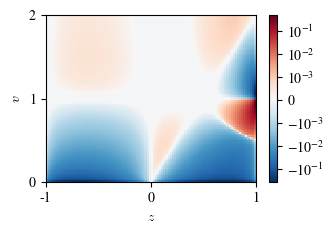

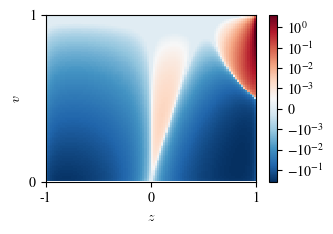

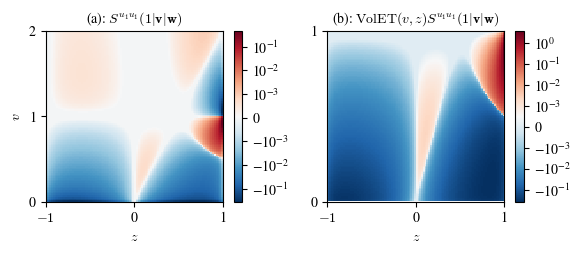

pn =  [-0.21772153 -2.36498701] 0.09395052097734753 [ 0.29282787  0.0592974   0.00334144 -0.01464584 -0.01957685]


<ipython-input-31-8f22c90456e1>:210: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

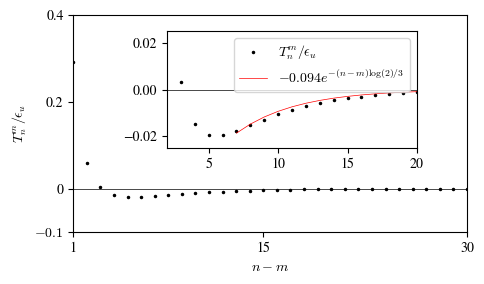

prefactor = 1.5359620155500302 0.1441 13.210119087135348


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

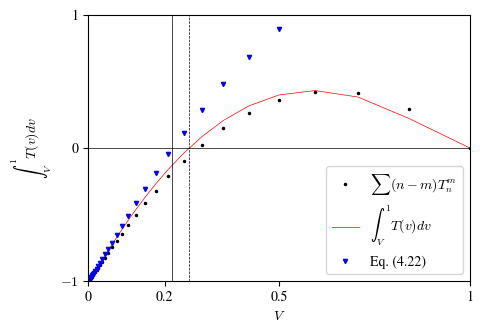

Integral, Ko=  1.5359620155500302 0.1441


In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from google.colab import files

d = 2
def Skpq_CH1(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = 1 + v**(2/3) + w**(2/3)
  numr1 =  (v*z)*(2*v*z-1) * 2*C(v)*C(w)
  numr2 = (v**3*z - 2*(v*z)**2) * 2*C(1)*C(w)
  numr3 = v*(1-v*v)*z * 2*C(1)*C(v)
  return (numr1 + numr2 + numr3)*(1-z**2)/(w**2*denr)

def Fv_CH1_plot(v,z):
  return dvol_ET(v,z) * np.log(1/v)/np.sqrt(1-z**2) * Skpq_CH1(v,z)


Nx = 100; Ny=100
eps = 1e-2
X, Y = np.mgrid[-1+eps:1-eps:complex(0, Nx), eps:2-eps:complex(0, Ny)]

Skpq_CH1_array = np.zeros([Nx,Ny])
Skpq_CH1_array = Skpq_CH1(Y,X)

fig, ax = plt.subplots(figsize = (3.5,2.5))

vmin_my = np.min(Skpq_CH1_array)
vmax_my = np.max(Skpq_CH1_array)

pcm = ax.pcolormesh(X, Y, Skpq_CH1_array,
          norm=colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,
          vmin=vmin_my, vmax=vmax_my), cmap='RdBu_r')

maxlog=int(np.ceil( np.log10(vmax_my) ))
minlog=int(np.ceil( np.log10(-vmin_my) ))

#generate logarithmic ticks
logthresh = 3
tick_locations=([-(10**x) for x in range(minlog,-logthresh-1,-1)]
                    +[0.0]
                    +[(10**x) for x in range(-logthresh,maxlog+1)] )

ax.set_xlabel('$z$')
ax.set_ylabel('$v$')
ax.set_xticks([-1,0,1])
ax.set_xticklabels([-1,0,1])
ax.set_yticks([0,1,2])
ax.set_yticklabels([0, 1,2])
fig.colorbar(pcm, ticks=tick_locations)
plt.tight_layout()
#plt.savefig("Suu_kpq_CH1.pdf")
#files.download("Suu_kpq_CH1.pdf")
plt.show()


##### Fv plot; Pi = \int Fv dv dz
eps = 1e-2
X, Y = np.mgrid[-1+eps:1-eps:complex(0, Nx), eps:1-eps:complex(0, Ny)]

Fv_CH1_plot_array = np.zeros([Nx,Ny])
Fv_CH1_plot_array = Fv_CH1_plot(Y,X)

fig, ax = plt.subplots(figsize = (3.5,2.5))

vmin_my = np.min(Fv_CH1_plot_array)
vmax_my = np.max(Fv_CH1_plot_array)

pcm = ax.pcolormesh(X, Y, Fv_CH1_plot_array,
                       norm=colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,
                                              vmin=vmin_my, vmax=vmax_my),
                       cmap='RdBu_r')

maxlog=int(np.ceil( np.log10(vmax_my) ))
minlog=int(np.ceil( np.log10(-vmin_my) ))

#generate logarithmic ticks
logthresh = 3
tick_locations=([-(10**x) for x in range(minlog,-logthresh-1,-1)]
                    +[0.0]
                    +[(10**x) for x in range(-logthresh,maxlog+1)] )

ax.set_xlabel('$z$')
ax.set_ylabel('$v$')
ax.set_xticks([-1,0,1])
ax.set_xticklabels([-1,0,1])
ax.set_yticks([0,1])
ax.set_yticklabels([0, 1])
fig.colorbar(pcm, ticks = tick_locations)
plt.tight_layout()
#plt.savefig("Tv_CH1.pdf")
#files.download("Tv_CH1.pdf")
plt.show()

######
### Skpq and Tv together..
#####
Nx = 100; Ny=100
eps = 1e-2
X, Y = np.mgrid[-1+eps:1-eps:complex(0, Nx), eps:2-eps:complex(0, Ny)]


Skpq_CH1_array = np.zeros([Nx,Ny])
Skpq_CH1_array = Skpq_CH1(Y,X)

fig, (ax1, ax2) =  plt.subplots(1, 2, figsize = (6,2.7))

vmin_my = np.min(Skpq_CH1_array)
vmax_my = np.max(Skpq_CH1_array)

pcm = ax1.pcolormesh(X, Y, Skpq_CH1_array,
          norm=colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,
          vmin=vmin_my, vmax=vmax_my), cmap='RdBu_r')

maxlog=int(np.ceil( np.log10(vmax_my) ))
minlog=int(np.ceil( np.log10(-vmin_my) ))

#generate logarithmic ticks
logthresh = 3
tick_locations=([-(10**x) for x in range(minlog,-logthresh-1,-1)]
                    +[0.0]
                    +[(10**x) for x in range(-logthresh,maxlog+1)] )

ax1.set_xlabel('$z$')
ax1.set_ylabel('$v$')
ax1.set_title('(a): $S^{u_1 u_1}(\mathbf{1|v|w}) $')
ax1.set_xticks([-1,0,1])
ax1.set_xticklabels(['$-1$',0,1])
ax1.set_yticks([0,1,2])
ax1.set_yticklabels([0, 1,2])
fig.colorbar(pcm, ticks=tick_locations)


##### Fv plot; Pi = \int Fv dv dz
eps = 1e-2
X, Y = np.mgrid[-1+eps:1-eps:complex(0, Nx), eps:1-eps:complex(0, Ny)]

Fv_CH1_plot_array = np.zeros([Nx,Ny])
Fv_CH1_plot_array = Fv_CH1_plot(Y,X)

vmin_my = np.min(Fv_CH1_plot_array)
vmax_my = np.max(Fv_CH1_plot_array)

pcm = ax2.pcolormesh(X, Y, Fv_CH1_plot_array,
                       norm=colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,
                                              vmin=vmin_my, vmax=vmax_my),
                       cmap='RdBu_r')

maxlog=int(np.ceil( np.log10(vmax_my) ))
minlog=int(np.ceil( np.log10(-vmin_my) ))

#generate logarithmic ticks
logthresh = 3
tick_locations=([-(10**x) for x in range(minlog,-logthresh-1,-1)]
                    +[0.0]
                    +[(10**x) for x in range(-logthresh,maxlog+1)] )

ax2.set_xlabel('$z$')
#ax2.set_ylabel('$v$')
ax2.set_title('(b): $ \mathrm{VolET}(v,z) S^{u_1 u_1}(\mathbf{1|v|w})  $')
ax2.set_xticks([-1,0,1])
ax2.set_xticklabels(['$-1$',0,1])
ax2.set_yticks([0,1])
ax2.set_yticklabels([0, 1])
fig.colorbar(pcm, ticks = tick_locations)

plt.tight_layout()
#plt.savefig("Suu_CH1_combined.pdf")
#iles.download("Suu_CH1_combined.pdf")
plt.show()

#### Tmn vs n-m
fig, ax = plt.subplots(figsize = (5,3.0))

x = np.linspace(1,30,30)

ax.plot(x,Tmn2D, 'k.', markersize=3)
ax.axhline(0,color='k',lw=0.5)


ax.set_xlabel('$n-m$')
ax.set_ylabel('$T^m_n/\epsilon_u$')
ax.set_xlim([1,30])
ax.set_ylim([-0.1,0.4])
ax.set_xticks([1,15,30])
ax.set_xticklabels([1,15,30])
ax.set_yticks([-0.1,0,0.2,0.4])
ax.set_yticklabels(['$-0.1$',0,0.2,0.4])


left, bottom, width, height = [0.35, 0.48, 0.50, 0.39]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(x,Tmn2D, 'k.', markersize=3, label = r'$T^m_n/\epsilon_u$')

xt = x[6:-1]
f= np.log(abs(Tmn2D[6:-1]))
pn = np.polyfit(xt, f,1)
print("pn = ", pn, np.exp(pn[1]), Tmn2D[0:5])
z1 = -np.exp(-xt*np.log(2)/3)*np.exp(pn[1])
ax2.plot(xt,z1,'r-',lw=0.5, label = r'$-0.094 e^{-(n-m)\log(2)/3}$')
ax2.legend(loc = 'upper right')

#ax2.set_xlabel('$n-m$')
#ax2.set_ylabel('$T^m_n$')
#ax2.set_title('Inset')
ax2.set_xlim([2,20])
ax2.set_ylim([-0.025,0.025])
ax2.axhline(0,color='k',lw=0.5)
plt.tight_layout()
plt.savefig("Tmn_CH1.pdf")
files.download("Tmn_CH1.pdf")
plt.show()

#####
# \int_{1/a}^1  T(v) dv

fig, ax = plt.subplots(figsize = (5,3.5))

prefactor = Ko_CH1**(3/2)/nu_CH1
print("prefactor =",Ko_CH1, nu_CH1, prefactor)

ind = np.arange(-30,0,1)
k = s**ind

cum_ET_CH1 = np.zeros(30)
i = 0
for kp in k:
  cum_ET_CH1[i] = prefactor*romberg(lambda v: fvET_CH1(v), kp, 1)
  i += 1

cumTmn_reversed = cumsumTmn2D[::-1]
cumTmn_reversed = np.append(cumTmn_reversed,np.array([0]))
cum_ET_CH1 = np.append(cum_ET_CH1,np.array([0]))
k = np.append(k,np.array([1]))

ax.plot(k,cumTmn_reversed,'k.',markersize = 3, label=r'$\sum (n-m)T^m_n$')
ax.plot(k, cum_ET_CH1, 'r-', lw = 0.5, label=r"$\int_{V}^1 T(v)dv$")


k2 = k[0:31]
ET2 = -1+prefactor*((1/4)*np.log(1/k2) +3/16)*k2**(4/3)
ax.plot(k2,ET2,'bv', markersize = 3, label=r'Eq. (4.22)')
ax.axhline(0,color='k',lw=0.5)
ax.axvline(0.22,color='k',lw=0.5)
ax.axvline(0.265,color='k',linestyle='--',lw=0.5)

ax.set_xlim([0,1])
ax.set_ylim([-1,1])
ax.set_xlabel('$V$')
ax.set_ylabel('$\int_{V}^1 T(v)dv$')
ax.set_xticks([0,0.2,0.5,1])
ax.set_xticklabels([0,0.2,0.5,1])
ax.set_yticks([-1,0,1])
ax.set_yticklabels(['$-1$',0,1])
plt.tight_layout(pad=1.1)
ax.legend(loc = 'lower right')
plt.savefig("Flux_fraction_CH1.pdf")
files.download("Flux_fraction_CH1.pdf")
plt.show()

print("Integral, Ko= ", Ko_CH1, nu_CH1)


In [ ]:
print(np.exp(pn[1]))

0.09393901100326366


In [ ]:
(-0.27087705+0.15970578)/(0.1767767 -0.2102241)*(0.0102241)+0.15970578

0.19368827734230465

# Plot 2D ww enstropy transfers

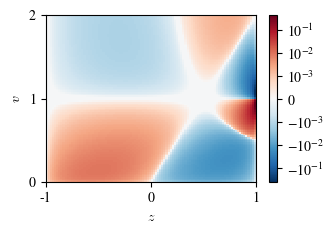

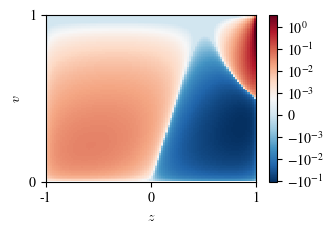

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

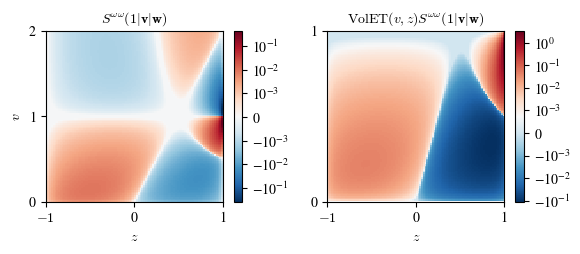

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from google.colab import files

d = 2

def Swwkpq_CH1(v,z):
  return Skpq_CH1(v,z)*(v/z)

def Fw_CH1_plot(v,z):
  return dvol_ET(v,z) * np.log(1/v)/np.sqrt(1-z**2) * Swwkpq_CH1(v,z)

Nx = 100; Ny=100
eps = 1e-2
X, Y = np.mgrid[-1+eps:1-eps:complex(0, Nx), eps:2-eps:complex(0, Ny)]

Skpq_CH1_array = np.zeros([Nx,Ny])
Skpq_CH1_array = Swwkpq_CH1(Y,X)

fig, ax = plt.subplots(figsize = (3.5,2.5))

vmin_my = np.min(Skpq_CH1_array)
vmax_my = np.max(Skpq_CH1_array)

pcm = ax.pcolormesh(X, Y, Skpq_CH1_array,
          norm=colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,
          vmin=vmin_my, vmax=vmax_my), cmap='RdBu_r')

maxlog=int(np.ceil( np.log10(vmax_my) ))
minlog=int(np.ceil( np.log10(-vmin_my) ))

#generate logarithmic ticks
logthresh = 3
tick_locations=([-(10**x) for x in range(minlog,-logthresh-1,-1)]
                    +[0.0]
                    +[(10**x) for x in range(-logthresh,maxlog+1)] )

ax.set_xlabel('$z$')
ax.set_ylabel('$v$')
ax.set_xticks([-1,0,1])
ax.set_xticklabels([-1,0,1])
ax.set_yticks([0,1,2])
ax.set_yticklabels([0, 1,2])
fig.colorbar(pcm, ticks=tick_locations)
plt.tight_layout()
#plt.savefig("Suu_kpq_CH1.pdf")
#files.download("Suu_kpq_CH1.pdf")
plt.show()


##### Fv plot; Pi = \int Fv dv dz
eps = 1e-2
X, Y = np.mgrid[-1+eps:1-eps:complex(0, Nx), eps:1-eps:complex(0, Ny)]

Fv_CH1_plot_array = np.zeros([Nx,Ny])
Fv_CH1_plot_array = Fw_CH1_plot(Y,X)

fig, ax = plt.subplots(figsize = (3.5,2.5))

vmin_my = np.min(Fv_CH1_plot_array)
vmax_my = np.max(Fv_CH1_plot_array)

pcm = ax.pcolormesh(X, Y, Fv_CH1_plot_array,
                       norm=colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,
                                              vmin=vmin_my, vmax=vmax_my),
                       cmap='RdBu_r')

maxlog=int(np.ceil( np.log10(vmax_my) ))
minlog=int(np.ceil( np.log10(-vmin_my) ))

#generate logarithmic ticks
logthresh = 3
tick_locations=([-(10**x) for x in range(minlog,-logthresh-1,-1)]
                    +[0.0]
                    +[(10**x) for x in range(-logthresh,maxlog+1)] )

ax.set_xlabel('$z$')
ax.set_ylabel('$v$')
ax.set_xticks([-1,0,1])
ax.set_xticklabels([-1,0,1])
ax.set_yticks([0,1])
ax.set_yticklabels([0, 1])
fig.colorbar(pcm, ticks = tick_locations)
plt.tight_layout()
#plt.savefig("Tv_CH1.pdf")
#files.download("Tv_CH1.pdf")
plt.show()

######
### Skpq and Tv together..
#####
Nx = 100; Ny=100
eps = 1e-2
X, Y = np.mgrid[-1+eps:1-eps:complex(0, Nx), eps:2-eps:complex(0, Ny)]


Skpq_CH1_array = np.zeros([Nx,Ny])
Skpq_CH1_array = Swwkpq_CH1(Y,X)

fig, (ax1, ax2) =  plt.subplots(1, 2, figsize = (6,2.7))

vmin_my = np.min(Skpq_CH1_array)
vmax_my = np.max(Skpq_CH1_array)

pcm = ax1.pcolormesh(X, Y, Skpq_CH1_array,
          norm=colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,
          vmin=vmin_my, vmax=vmax_my), cmap='RdBu_r')

maxlog=int(np.ceil( np.log10(vmax_my) ))
minlog=int(np.ceil( np.log10(-vmin_my) ))

#generate logarithmic ticks
logthresh = 3
tick_locations=([-(10**x) for x in range(minlog,-logthresh-1,-1)]
                    +[0.0]
                    +[(10**x) for x in range(-logthresh,maxlog+1)] )

ax1.set_xlabel('$z$')
ax1.set_ylabel('$v$')
ax1.set_title('$ S^{\omega \omega} (\mathbf{1|v|w}) $')
ax1.set_xticks([-1,0,1])
ax1.set_xticklabels(['$-1$',0,1])
ax1.set_yticks([0,1,2])
ax1.set_yticklabels([0, 1,2])
fig.colorbar(pcm, ticks=tick_locations)


##### Fv plot; Pi = \int Fv dv dz
eps = 1e-2
X, Y = np.mgrid[-1+eps:1-eps:complex(0, Nx), eps:1-eps:complex(0, Ny)]

Fv_CH1_plot_array = np.zeros([Nx,Ny])
Fv_CH1_plot_array = Fw_CH1_plot(Y,X)

vmin_my = np.min(Fv_CH1_plot_array)
vmax_my = np.max(Fv_CH1_plot_array)

pcm = ax2.pcolormesh(X, Y, Fv_CH1_plot_array,
                       norm=colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,
                                              vmin=vmin_my, vmax=vmax_my),
                       cmap='RdBu_r')

maxlog=int(np.ceil( np.log10(vmax_my) ))
minlog=int(np.ceil( np.log10(-vmin_my) ))

#generate logarithmic ticks
logthresh = 3
tick_locations=([-(10**x) for x in range(minlog,-logthresh-1,-1)]
                    +[0.0]
                    +[(10**x) for x in range(-logthresh,maxlog+1)] )

ax2.set_xlabel('$z$')
#ax2.set_ylabel('$v$')
ax2.set_title('$ \mathrm{VolET}(v,z) S^{\omega \omega} (\mathbf{1|v|w}) $')
ax2.set_xticks([-1,0,1])
ax2.set_xticklabels(['$-1$',0,1])
ax2.set_yticks([0,1])
ax2.set_yticklabels([0, 1])
fig.colorbar(pcm, ticks = tick_locations)

plt.tight_layout()
plt.savefig("Sww_CH1_combined.pdf")
files.download("Sww_CH1_combined.pdf")
plt.show()


#

In [ ]:
print (vmin_my, vmax_my)

-0.0574219502286469 1.7250323881081946


# Plot CH2-ET

Tnm = 0.04219*exp(-0.229*(n-m))



Inside plot CH2 integ_ET_CH2 =  0.21614288919980962 1.7160790828430448 0.4859


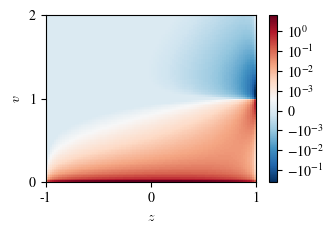

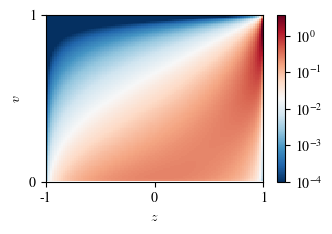

[-0.22851974 -3.16563267] 0.04218744274179183


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

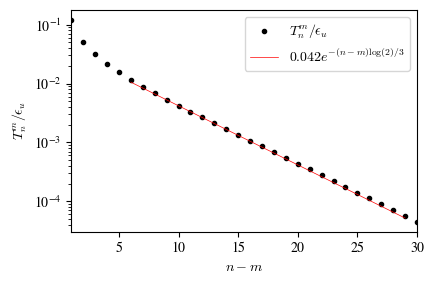

 Ko_CH2 = 1.7160790828430448 0.4859


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

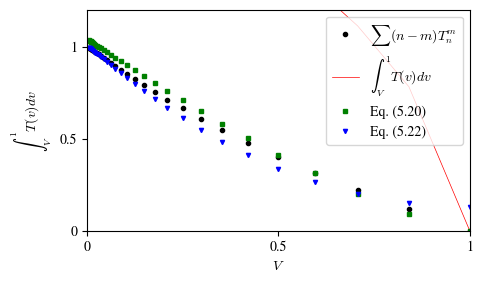

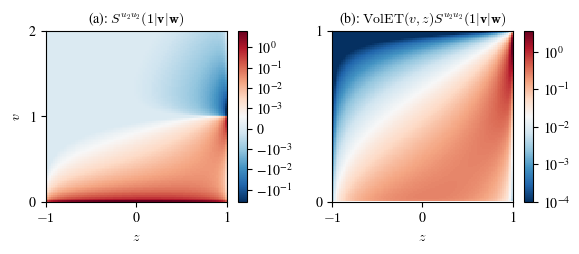

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from google.colab import files

d = 3

print("Inside plot CH2 integ_ET_CH2 = ", integ_ET_CH2, Ko_CH2, nu_CH2)


def Skpq_CH2(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = 1 + v**(2/3) + w**(2/3)
  return -v**2 *(1-z**2) *(C(1)-C(v))* C(w)/(w**2*denr)

def Fv_CH2_plot(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = 1 + v**(2/3) + w**(2/3)
  return dvol_ET(v,z) * np.log(1/v)* Skpq_CH2(v,z)

Nx = 100; Ny=100
eps = 1e-2
X, Y = np.mgrid[-1+eps:1-eps:complex(0, Nx), eps:2-eps:complex(0, Ny)]

Skpq_CH2_array = np.zeros([Nx,Ny])
Skpq_CH2_array = Skpq_CH2(Y,X)

fig, ax = plt.subplots(figsize = (3.5,2.5))

vmin_my = np.min(Skpq_CH2_array)
vmax_my = np.max(Skpq_CH2_array)

pcm = ax.pcolormesh(X, Y, Skpq_CH2_array,
                       norm=colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,
                                              vmin=vmin_my, vmax=vmax_my),
                       cmap='RdBu_r')

maxlog=int(np.ceil( np.log10(vmax_my) ))
minlog=int(np.ceil( np.log10(-vmin_my) ))

#generate logarithmic ticks
logthresh = 3
tick_locations=([-(10**x) for x in range(minlog,-logthresh-1,-1)]
                    +[0.0]
                    +[(10**x) for x in range(-logthresh,maxlog+1)] )

ax.set_xlabel('$z$')
ax.set_ylabel('$v$')
ax.set_xticks([-1,0,1])
ax.set_xticklabels([-1,0,1])
ax.set_yticks([0,1,2])
ax.set_yticklabels([0, 1,2])
fig.colorbar(pcm, ticks=tick_locations)
plt.tight_layout(pad=1.08)
#plt.savefig("Suu_kpq_CH2.pdf")
#files.download("Suu_kpq_CH2.pdf")
plt.show()

##### Fv plot; Pi = \int Fv dv dz
eps = 1e-2
X, Y = np.mgrid[-1+eps:1-eps:complex(0, Nx), eps:1-eps:complex(0, Ny)]

Fv_CH2_plot_array = np.zeros([Nx,Ny])
Fv_CH2_plot_array = Fv_CH2_plot(Y,X)

fig, ax = plt.subplots(figsize = (3.5,2.5))

vmin_my = np.min(Fv_CH2_plot_array)
vmax_my = np.max(Fv_CH2_plot_array)

pcm = ax.pcolormesh(X, Y, Fv_CH2_plot_array,
              norm=colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,
              vmin=vmin_my, vmax=vmax_my),
                       cmap='RdBu_r')

ax.set_xlabel('$z$')
ax.set_ylabel('$v$')
ax.set_xticks([-1,0,1])
ax.set_xticklabels([-1,0,1])
ax.set_yticks([0,1])
ax.set_yticklabels([0, 1])
fig.colorbar(pcm)
plt.tight_layout(pad=1.08)
#plt.savefig("Tv_CH2.pdf")
#files.download("Tv_CH2.pdf")
plt.show()


#### Tmn vs n-m
fig, ax = plt.subplots(figsize = (4.5,3))

x = np.linspace(1,30,30)
ax.semilogy(x,Tmn,'k.',label = r'$T^m_n/\epsilon_u$')

xt = x[5:-1]
f= np.log(Tmn[5:-1])
pn = np.polyfit(xt, f,1)
print(pn, np.exp(pn[1]))
z1 = np.exp(-np.log(2)/3*xt)*np.exp(pn[1])
ax.semilogy(xt,z1,'r-',lw=0.5, label = r'$0.042 e^{-(n-m)\log(2)/3}$')
ax.set_xlim([1,30])
ax.set_xlabel('$n-m$')
ax.set_ylabel("$T^m_n/\epsilon_u$")
ax.legend(loc = 'upper right')
plt.tight_layout()
#plt.savefig("Tmn_CH2.pdf")
#files.download("Tmn_CH2.pdf")
plt.show()

'''
prefactor = Ko_CH2**(3/2)/nu_CH2
z = prefactor*3*np.pi**2*(s**(4/3)-1)**2/s**(4/3)*np.exp(-np.log(2)*x/3)
ax.semilogy(x,z/200,'k-')
'''


#####
### \int_v^1 Tv(v') dv'

fig, ax = plt.subplots(figsize = (5,3))

prefactor = Ko_CH2**(3/2)/nu_CH2
print(" Ko_CH2 =", Ko_CH2, nu_CH2)

ind = np.arange(-30,0,1)
k = s**ind

cum_ET_CH2 = np.zeros(30)
i = 0
for kp in k:
  cum_ET_CH2[i] = prefactor*romberg(lambda v: fvET_CH2(v), kp, 1)
  i += 1

cumTmn_reversed = cumsumTmn[::-1]
cumTmn_reversed = np.append(cumTmn_reversed,np.array([0]))
cum_ET_CH2 = np.append(cum_ET_CH2,np.array([0]))
k = np.append(k,np.array([1]))

ax.plot(k,cumTmn_reversed,'k.',label=r'$\sum (n-m)T^m_n$')
ax.plot(k, cum_ET_CH2, 'r-', lw = 0.5, label=r"$\int_{V}^1 T(v)dv$")
#ax.plot(k,1-k,'-.', label=r'$1-v$')
ax.plot(k,prefactor*(9/40)*(1-k)**(4/3),'gs', markersize = 3, label=r'Eq. (5.20)')
ET2 = 1-prefactor*((1/4)*np.log(1/k) +3/16)*k**(4/3)
ax.plot(k,ET2,'bv', markersize = 3, label=r'Eq. (5.22)')

ax.set_xlim([0,1])
ax.set_ylim([0,1.2])
ax.set_xlabel('$V$')
ax.set_ylabel("$\int_{V}^1 T(v)dv$")
ax.set_xticks([0,0.5,1])
ax.set_xticklabels([0,0.5,1])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels([0,0.5,1])
plt.tight_layout(pad=1.1)
ax.legend(loc = 'upper right')
#plt.savefig("Flux_fraction_CH2.pdf")
#files.download("Flux_fraction_CH2.pdf")
plt.show()


######
### Skpq and Tv together..
#####
Nx = 100; Ny=100
eps = 1e-2
X, Y = np.mgrid[-1+eps:1-eps:complex(0, Nx), eps:2-eps:complex(0, Ny)]


Skpq_CH2_array = np.zeros([Nx,Ny])
Skpq_CH2_array = Skpq_CH2(Y,X)

fig, (ax1, ax2) =  plt.subplots(1, 2, figsize = (6,2.7))

vmin_my = np.min(Skpq_CH2_array)
vmax_my = np.max(Skpq_CH2_array)

pcm = ax1.pcolormesh(X, Y, Skpq_CH2_array,
          norm=colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,
          vmin=vmin_my, vmax=vmax_my), cmap='RdBu_r')

maxlog=int(np.ceil( np.log10(vmax_my) ))
minlog=int(np.ceil( np.log10(-vmin_my) ))

#generate logarithmic ticks
logthresh = 3
tick_locations=([-(10**x) for x in range(minlog,-logthresh-1,-1)]
                    +[0.0]
                    +[(10**x) for x in range(-logthresh,maxlog+1)] )

ax1.set_xlabel('$z$')
ax1.set_ylabel('$v$')
ax1.set_title('(a): $S^{u_2 u_2}(\mathbf{1|v|w})$')
ax1.set_xticks([-1,0,1])
ax1.set_xticklabels(['$-1$',0,1])
ax1.set_yticks([0,1,2])
ax1.set_yticklabels([0, 1,2])
fig.colorbar(pcm, ticks=tick_locations)


##### Fv plot; Pi = \int Fv dv dz
eps = 1e-2
X, Y = np.mgrid[-1+eps:1-eps:complex(0, Nx), eps:1-eps:complex(0, Ny)]

Fv_CH2_plot_array = np.zeros([Nx,Ny])
Fv_CH2_plot_array = Fv_CH2_plot(Y,X)

vmin_my = np.min(Fv_CH2_plot_array)
vmax_my = np.max(Fv_CH2_plot_array)

pcm = ax2.pcolormesh(X, Y, Fv_CH2_plot_array,
                       norm=colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,
                                              vmin=vmin_my, vmax=vmax_my),
                       cmap='RdBu_r')

ax2.set_xlabel('$z$')
#ax2.set_ylabel('$v$')
ax2.set_title('(b): $ \mathrm{VolET}(v,z) S^{u_2 u_2}(\mathbf{1|v|w}) $')
ax2.set_xticks([-1,0,1])
ax2.set_xticklabels(['$-1$',0,1])
ax2.set_yticks([0,1])
ax2.set_yticklabels([0, 1])
fig.colorbar(pcm)

plt.tight_layout()
#plt.savefig("Suu_CH2_combined.pdf")
#files.download("Suu_CH2_combined.pdf")
plt.show()






# 3D: ET sub_components

In [ ]:

d=3

def fET_CH2(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = 1 + v**(2/3) + w**(2/3)
  return dvol_ET(v,z) * v**2 * (1-z**2) * (C(1)-C(v))* C(w)/(w**2*denr)

# for v->1, z-> 1, w-> 0
def fET_CH2_asymp(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = 2 #1 + v**(2/3) + w**(2/3)
  C_w = (2*(1-z)+(v-1)**2)**(-17/6)/(4*np.pi)
  C_v_diff = (11/3)*(v-1)/(4*np.pi)
 # print("inside: v ", C(w)/w**2, C_w, (C(1)-C(v)), C_v_diff)
 # return dvol_ET(v,z) * v**2 * (1-z**2) * C_v_diff * C_w/(denr)
  return  dvol_ET(v,z) * v**2 * 2* (1-z) * C_v_diff * C_w/(denr)

# for v -> 0, all z's, w -> 1
def fET_CH2_asymp2(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = 2 #1 + v**(2/3) + w**(2/3)
  C_w = 1/(4*np.pi)
  C_v_diff = -v**(-11/3)/(4*np.pi)
 # print("inside: v ", C(w)/w**2, C_w, (C(1)-C(v)), C_v_diff)
 # return dvol_ET(v,z) * v**2 * (1-z**2) * C_v_diff * C_w/(denr)
  return  dvol_ET(v,z) * v**2 * (1-z**2) * C_v_diff * C_w/(denr)

def fvET_CH2_test(v):
  return (-np.log(1/v)* quad(lambda z: fET_CH2(v,z), 0.8, 1-myeps)[0], \
          -np.log(1/v)* quad(lambda z: fET_CH2_asymp(v,z), -1, 1-myeps)[0])


def fvET_CH2(v):
  return -np.log(1/v)* quad(lambda z: fET_CH2(v,z), -1, 1-myeps)[0]

def fvET_CH2_asymp(v):
  return -np.log(1/v)* quad(lambda z: fET_CH2_asymp(v,z), 0.8, 1-myeps)[0]

def fvET_CH2_asymp2(v):
  return -np.log(1/v)* quad(lambda z: fET_CH2_asymp2(v,z), -1, 1-myeps)[0]



#for myeps in [1e-3, 1e-4, 1e-5, 1e-6]:
#  print(myeps, fvET_CH2_test(0.9),  18/55*0.1**(-5/3)/(4*np.pi))

#myeps = 1e-5
#print(romberg(lambda v: fvET_CH2(v), 1e-6, 1))

for myeps in [1e-3, 1e-4, 1e-5, 1e-6]:
  integ_ET_CH2 = romberg(lambda v: fvET_CH2(v), 0.9, 1)
  integ_ET_CH2_asymp = romberg(lambda v: fvET_CH2_asymp(v), 0.9, 1)
#  print(myeps, integ_ET_CH2, integ_ET_CH2_asymp, (1/4*np.log(1/0.1)+(3/16))*(0.1)**(4/3))
  print(myeps, integ_ET_CH2, integ_ET_CH2_asymp, (9/40)*(0.1)**(4/3))




0.001 0.007405199255485554 0.0060913753265614805 0.010443574875628756
0.0001 0.00914375893394396 0.007717166929086163 0.010443574875628756
1e-05 0.00955262184150369 0.008120005566122218 0.010443574875628756


<ipython-input-41-982666f70b88>:34: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return -np.log(1/v)* quad(lambda z: fET_CH2(v,z), -1, 1-myeps)[0]
<ipython-input-41-982666f70b88>:34: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return -np.log(1/v)* quad(lambda z: fET_CH2(v,z), -1, 1-myeps)[0]
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.360954e-05
  warnings.warn(


1e-06 0.009606461822482041 0.00820981893366524 0.010443574875628756


# 3D: S2S Asymptotic

In [ ]:
from scipy.special import roots_jacobi

d=3
n=500

alpha = 1; beta = 1

[rt, wt] = roots_jacobi(n, alpha, beta, mu=False)

def fET_CH2(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = 1 + v**(2/3) + w**(2/3)
  return dvol_ET(v,z) * v**2 * (C(1)-C(v))* C(w)/(w**2*denr)

def fET_CH2_asymp(v,z):
  w = np.sqrt(1 + v**2 - 2*v*z)
  denr = 2 #1 + v**(2/3) + w**(2/3)
  C_w = (2*(1-z)+(v-1)**2)**(-17/6)/(4*np.pi)
  C_v_diff = (11/3)*(v-1)/(4*np.pi)
  return  dvol_ET(v,z) * v**2 * C_v_diff * C_w/(denr)

def fuv_shell_CH2(u, v):
  return -sum(fET_CH2(v, rt)*wt)/u

def fuv_shell_CH2_asymp(u, v):
  return -sum(fET_CH2_asymp(v, rt)*wt)/u

nu_CH2 = 0.3460
Ko_CH2 = 1.368

s=2**(1/4)
prefactor = Ko_CH2**(3/2)/nu_CH2

n_m = 1
integ = romberg(lambda u: romberg(lambda v: fuv_shell_CH2(u,v), \
                                  u*s**(-n_m),u*s**(-n_m+1)), 1/s, 1)

integ_asympt = romberg(lambda u: romberg(lambda v: fuv_shell_CH2_asymp(u,v), \
                                  u*s**(-n_m),u*s**(-n_m+1)), 1/s, 1)

def f(y):
  return ((3/4)*y**(4/3) + (3/7)*y**(7/3) + (3/10)*y**(10/3)+ (3/14)*y**(14/3))

formula = -prefactor*(9/10)*(2*f(1-1/s)-f(1-1/s**2))

print("S2S T^m_n = ", prefactor*integ, prefactor*integ_asympt, formula)

S2S T^m_n =  0.1192807338373378 0.07949029385173484 0.13956827141003506


# Test

In [ ]:
def RG1_CH1(v,z):
  wsqr = 1 + v**2 - 2*v*z
  denr = v**(2/3) + wsqr**(1/3)
  return  dvol_RG(v,z)*C(v)*(1-z**2)*(1-v**2) \
          *(2*v*z-1)/(wsqr*denr)

def RG1_CH1_paper(v,z):
    w = np.sqrt(1+v**2-2*v*z)
    denr = v**(2/3) + w**(2/3)
    return (2/np.pi)* v*np.sqrt(1-z**2)*(1-v**2)*(2*v*z-1) \
          *v**(-8/3)/(w**2 * denr)
 #   return (4/np.pi)*np.sqrt(1-z**2)*(1-v**2)*(2*v*z-1) \
 #         *v**(-8/3)/(w**2 * denr)

#v=1/2; z=1/2
#print(dvol_RG(v,z), (2)/np.sqrt(1-z**2))
#print(dvol_RG(v,z)*C(v)*(1-z**2), (2/np.pi)* np.sqrt(1-z**2)*v**(-8/3))

def RG2_CH1_paper(v,z):
    w = np.sqrt(1+v**2-2*v*z)
    denr = v**(2/3) + w**(2/3)
    return (2/np.pi)*v*np.sqrt(1-z**2)*v*(v-2*z)*(2*v*z-1) \
          *w**(-14/3)/(denr)

print(RG1_CH1(1/2,1/2),RG1_CH1_paper(1/2,1/2) )
print(RG2_CH1(1/2,1/2),RG2_CH1_paper(1/2,1/2) )

-0.568845124759114 -0.5688451247591139
0.04382390895679168 0.043823908956791675


In [ ]:
s=2**(1/4)
factor2d = (3/16)*(1.536)**1.5/0.1441
factor3d = (3/16)*(1.715)**1.5/0.4859
spow = ((s**(4/3)-1)**2)/s**(4/3)
print(factor3d, spow, factor3d*spow)
print(factor2d, spow, factor2d*spow)

0.8666636060960556 0.05362157587897291 0.046471868315823936
2.4769892101767907 0.05362157587897291 0.13282006488489198


 Ko_CH2 = 1.7160790828430448 0.4859


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.218390e-07
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.163174e-07
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.117326e-07
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.072723e-07
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.024338e-07
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (10) exceeded. Latest difference = 6.968819e-07
  warnings.warn(
/usr/local

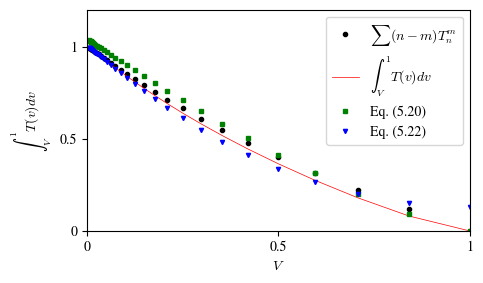

In [ ]:

#####
### \int_v^1 Tv(v') dv'

fig, ax = plt.subplots(figsize = (5,3))

prefactor = Ko_CH2**(3/2)/nu_CH2
print(" Ko_CH2 =", Ko_CH2, nu_CH2)

ind = np.arange(-30,0,1)
k = s**ind

cum_ET_CH2 = np.zeros(30)
i = 0
for kp in k:
  cum_ET_CH2[i] = prefactor*romberg(lambda v: fvET_CH2(v), kp, 1)
  i += 1

cumTmn_reversed = cumsumTmn[::-1]
cumTmn_reversed = np.append(cumTmn_reversed,np.array([0]))
cum_ET_CH2 = np.append(cum_ET_CH2,np.array([0]))
k = np.append(k,np.array([1]))

ax.plot(k,cumTmn_reversed,'k.',label=r'$\sum (n-m)T^m_n$')
ax.plot(k, cum_ET_CH2, 'r-', lw = 0.5, label=r"$\int_{V}^1 T(v)dv$")
#ax.plot(k,1-k,'-.', label=r'$1-v$')
ax.plot(k,prefactor*(9/40)*(1-k)**(4/3),'gs', markersize = 3, label=r'Eq. (5.20)')
ET2 = 1-prefactor*((1/4)*np.log(1/k) +3/16)*k**(4/3)
ax.plot(k,ET2,'bv', markersize = 3, label=r'Eq. (5.22)')

ax.set_xlim([0,1])
ax.set_ylim([0,1.2])
ax.set_xlabel('$V$')
ax.set_ylabel("$\int_{V}^1 T(v)dv$")
ax.set_xticks([0,0.5,1])
ax.set_xticklabels([0,0.5,1])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels([0,0.5,1])
plt.tight_layout(pad=1.1)
ax.legend(loc = 'upper right')
#plt.savefig("Flux_fraction_CH2.pdf")
#files.download("Flux_fraction_CH2.pdf")
plt.show()


In [ ]:

Ko_CH1 = 5.829
nu1 = 0.10260395587799516
a = 0.5
I = 0.1*a**(10/3)*(np.log(1/a)+0.3)*Ko_CH1**(3/2)/nu1
print(Ko_CH1, nu1, I)

print(0.0093*Ko_CH1**(3/2)/nu1)

a = 0.8
I = 0.1*a**(10/3)*(np.log(1/a)+0.3)*Ko_CH1**(3/2)/nu1
print(Ko_CH1, nu1, I)

#I  = 0.00937
#print ( I*Ko_CH1**(3/2)/nu1)

5.829 0.10260395587799516 1.351472686244223
1.2755865352092108
5.829 0.10260395587799516 3.410471913176737
